# 1.  Linear-Regression Model 
using scikit-learning

In [39]:
%matplotlib inline

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random

**Step1:generate data**

In [41]:
random_data = np.random.random((20,2))

In [43]:
X = random_data[:,0]

In [44]:
y = random_data[:,1]

In [45]:
def assuming_function(x):
    return 13.4*x+5+random.randint(-5,5)

In [46]:
y=[assuming_function(x) for x in X]

In [47]:
print(y)

[17.06414380175114, 11.403185923160162, 4.656352305677131, 18.280479491499186, 17.349193877872274, 4.86557667871045, 17.567127804286034, 4.341855550361794, 1.2338505558176056, 13.010491643801922, 4.2785357660338725, 9.318802482170636, 17.947270620467023, 15.705260486273941, 16.30240979774042, 15.63616603078426, 10.994835829771976, 8.510247947122659, 5.969814547282037, 13.074341909926966]


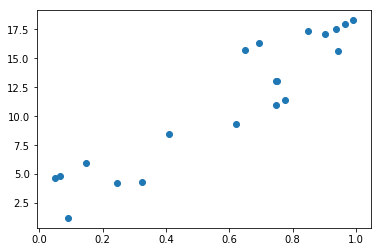

In [48]:
plt.scatter(X,y)

In [49]:
y = np.array(y)

In [50]:
print(y)

[17.0641438  11.40318592  4.65635231 18.28047949 17.34919388  4.86557668
 17.5671278   4.34185555  1.23385056 13.01049164  4.27853577  9.31880248
 17.94727062 15.70526049 16.3024098  15.63616603 10.99483583  8.51024795
  5.96981455 13.07434191]


**Step2:build linear model**

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reg = LinearRegression().fit(X.reshape(-1,1),y)

In [53]:
reg.score(X.reshape(-1,1),y)

0.8677762138307111

In [54]:
reg.coef_

array([15.80712246])

In [55]:
reg.intercept_

1.9673135591327071

In [56]:
def f(x):
    return reg.coef_*x+reg.intercept_

**Step3:plot data**

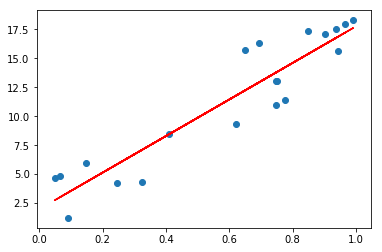

In [57]:
plt.scatter(X,y)
plt.plot(X,f(X),color='red')

**Step4:predict**

In [58]:
reg.predict(X.reshape(-1,1))

array([16.19861195, 14.23928623,  2.74157037, 17.63344532, 15.35523128,
        2.98837897, 16.79194999,  7.08912269,  3.4228081 , 13.77604992,
        5.83479239, 11.78047248, 17.24038014, 12.23635226, 12.94077108,
       16.87338997, 13.75758176,  8.46740043,  4.29097772, 13.85137   ])

# 2.  KNN model

**Step1：datasets**

In [72]:
def model(X,y):
    return [(Xi,yi) for Xi,yi in zip(X,y)]

**Step2：Define distance**

**cosine similarity:**<br>
$$cos\theta = \frac{a*b}{\lVert a \rVert * \lVert b \rVert} = \frac{x_1*y_1+x_2*y_2+...+x_n*y_n}{\sqrt{x_1^2+x_2^2+...+x_n^2}*\sqrt{y_1^2+y_2^2+...+y_n^2}}$$
**cosine distance = 1-cosine similarity**<br>
距离越接近于0，两向量越相似

In [73]:
from scipy.spatial.distance import cosine

In [91]:
def distance(x1,x2):
    if isinstance(x1,int) or isinstance(x1,float):
        return abs(x1-x2)
    if isinstance(x1,list) and len(x1)>=2:
        return cosine(x1,x2)

**Step3：Predict k neighbors**

In [92]:
def predict_neighbor(x,k=5):
    most_similars = sorted(model(X,y),key=lambda xi:distance(xi[0],x))[:k]
    return most_similars

In [93]:
most_similars = predict_neighbor(0.6)
most_similars

[(0.6208061553858684, 9.318802482170636),
 (0.6496463049458165, 15.705260486273941),
 (0.6942096863985388, 16.30240979774042),
 (0.7458832708785056, 10.994835829771976),
 (0.7470516152090987, 13.010491643801922)]

**Step4：预测结果**

In [94]:
def predict(x):
    most_similars = predict_neighbor(x,k=5)
    return most_similars[0][1]

In [95]:
predict(0.6)

9.318802482170636

# 3.  Decision Tree

**1.信息熵：**<br>
$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$
**2.Gini纯度：**<br>
$$ Gini = 1 - \sum_{i=1}^J P_i^2  $$

In [99]:
from collections import Counter
from icecream import ic
import numpy as np

**Step1:Define entropy**

In [136]:
#信息熵
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c]/len(elements) for c in set(elements)]
    #ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [101]:
entropy([1,1,1,1]) #分布均匀，entropy=1

ic| probs: [1.0]


-0.0

In [102]:
entropy([1,2,3,4]) #分布最乱

ic| probs: [0.25, 0.25, 0.25, 0.25]


1.3862943611198906

**Step2:Load data**

In [103]:
import pandas as pd

In [112]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    #'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [113]:
type(mock_data)

dict

In [114]:
dataset = pd.DataFrame.from_dict(mock_data)

In [115]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


**Step3: Find the best split method**

In [137]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target:str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        #ic(f)
        values = set(training_data[f])
        #ic(values)
        for v in values:
            #sub_spliter_1
            sub_spliter_1 = training_data[training_data[f]== v][target].tolist()
            #ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
            #ic(entropy_1)
            #sub_spliter_2
            sub_spliter_2 = training_data[training_data[f]!= v][target].tolist()
            #ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
            #ic(entropy_2)
            #the sum of entropy
            entropy_v = entropy_1 + entropy_2
            #ic(entropy_v)
            #compare
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
        #ic(min_entropy)
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy)) 
    return spliter
        

In [138]:
find_the_optimal_spilter(training_data=dataset,target='bought')

spliter is: ('income', '+10')
the min entropy is: 0.6730116670092565


('income', '+10')

**Step4:Continue choosing the best spliter**

In [153]:
spliters=[]
def split_all(training_data: pd.DataFrame, target:str):
    
    print(training_data)
    spliter = find_the_optimal_spilter(training_data,target)
    print("Spliter:",spliter)
    if spliter:
        spliters.append(spliter)
        f,v = spliter[0],spliter[1]
        subset1 = training_data[training_data[f] == v].drop([f],axis=1)
        if entropy(subset1[target].tolist()) != 0:
            split_all(subset1,target)
        subset2 = training_data[training_data[f] != v].drop([f],axis=1)
        if entropy(subset2[target].tolist()) !=0:
            split_all(subset2,target)
    return spliters

In [154]:
split_all(training_data=dataset,target='bought')

  gender income  family_number  bought
0      F    +10              1       1
1      F    -10              1       1
2      F    +10              2       1
3      F    +10              1       0
4      M    +10              1       0
5      M    +10              1       0
6      M    -10              2       1
spliter is: ('income', '+10')
the min entropy is: 0.6730116670092565
Spliter: ('income', '+10')
  gender  family_number  bought
0      F              1       1
2      F              2       1
3      F              1       0
4      M              1       0
5      M              1       0
spliter is: ('family_number', 2)
the min entropy is: 0.5623351446188083
Spliter: ('family_number', 2)
  gender  bought
0      F       1
3      F       0
4      M       0
5      M       0
spliter is: ('gender', 'F')
the min entropy is: 0.6931471805599453
Spliter: ('gender', 'F')
   bought
0       1
3       0
spliter is: None
the min entropy is: inf
Spliter: None


[('income', '+10'), ('family_number', 2), ('gender', 'F')]

# 4.  K-Means

In [69]:
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt

In [70]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

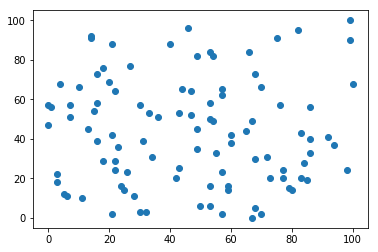

In [71]:
plt.scatter(X1,X2)

In [72]:
training_data = [[x1,x2] for x1,x2 in zip(X1,X2)]

In [75]:
cluster = KMeans(n_clusters=6,max_iter=500)

In [77]:
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
cluster.cluster_centers_

array([[22.09090909, 20.86363636],
       [88.5       , 42.7       ],
       [13.42105263, 65.57894737],
       [51.61111111, 50.44444444],
       [67.73684211, 14.89473684],
       [66.75      , 85.91666667]])

In [80]:
cluster.labels_

array([2, 2, 0, 3, 0, 0, 3, 2, 0, 0, 0, 2, 3, 4, 4, 4, 5, 0, 0, 2, 0, 3,
       2, 5, 4, 4, 5, 3, 3, 2, 0, 0, 5, 3, 1, 3, 4, 2, 0, 5, 0, 1, 0, 1,
       4, 2, 3, 5, 3, 2, 5, 0, 2, 4, 5, 3, 3, 0, 4, 0, 2, 1, 4, 3, 1, 3,
       1, 4, 4, 2, 4, 5, 3, 1, 4, 1, 3, 0, 2, 4, 2, 0, 5, 4, 0, 1, 2, 2,
       2, 5, 3, 3, 4, 5, 2, 0, 4, 4, 0, 1])

画图：

In [81]:
from collections import defaultdict

In [82]:
centers = defaultdict(list)

In [87]:
for label,location in zip(cluster.labels_,training_data):
    centers[label].append(location)

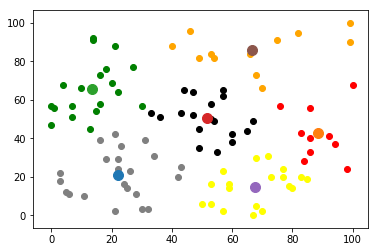

In [89]:
color = ['red','green', 'grey', 'black', 'yellow', 'orange']
for i,c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location,c=color[i])
for center in cluster.cluster_centers_:
    plt.scatter(*center,s=100)